<a href="https://colab.research.google.com/github/shinnew9/Apziva_practice_code/blob/main/Project2-TermDepositMarketing/3rdLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Report f2score, and write conclusion for the 2nd layer. And then let's start the next layer.


Notes for Nov 12th.
1. 1st layer: write a conclusion that how much time I will be save for the company vs what % of subscribers will I be loosing
2. 2nd layer: Our goal is to retain as many subscribers as possible, try to as precise as possible,
- will be able to prioritize
- the company to prioritze the company
- especially! Experiment with few models, samplers, see how much I can get as high as possible, there's no benchmark here.
3. 3rd layer: unsupervised learning : K-means,  and hierarchical clustering (these are clustering, only apply to subscribers) to filter out non-subscribers, because I want to do customer segmentation
3rd part: visualize and apply different unsupervised techniques, such as PCA, TSNE, UMAP, and then finalize everything

Getting exposed to dashboarding tools, important for my resume/cv: valuable for data science, data analyze such as Tableau, PowerBI (going to stregthen my career)

After all of these, will be concluding and wrapping things up.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
import os
import random

# Warnings
import warnings
warnings.filterwarnings("ignore")

# EDA
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Models
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# from collections import Counter

# 3rd layer
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Validation
from sklearn.metrics import recall_score, classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, fbeta_score

In [ ]:
# Read dataset
df = pd.read_csv('/content/drive/MyDrive/Apziva/TermDepositMarketing/term-deposit-marketing-2020.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


## Models - 3 layers

1. 1st Layer: A layer to predict which of the potential customers we should make calls to (haven't make any calls yet,can't use any call-related features like duration, campaign, month of the call and etc).
2. 2nd Layer: A layer to predict which of the customers we should keep calling to. This means calls have already been made, I can use call-related data, to predict which of the customers we should keep making calls to. (precision for class 1)

They do not directly affect each other
3. 3rd Layer: Train both with the unsupervised model, to understand who those customers are and filtered the non-subscribers. The goal is to segment the subscribers.

In [ ]:
seed = random.randint(1000, 9999)
print(seed)

5101


In [ ]:
df_copy = df.copy()
df_copy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


### Train_test_split for Layer2

In [ ]:
for col in df.columns:
  print(col, df[col].unique())
  df_copy[col] = pd.factorize(df_copy[col])[0]
# df_copy

X2 = df_copy.drop(columns=['y'])   # The entire dataset is required so just drop Y.
# X2
y2 = df_copy['y']
y2

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [  2143     29      2 ...   7222   3402 102127]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
duration [ 261  151   76 ... 1880 1460 2219]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


,y
0,0
1,0
2,0
3,0
4,0
...,...
39995,0
39996,1
39997,1
39998,0


In [ ]:
# Split the dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=seed)

In [ ]:
# X2_train is the entire dataset - should I apply the whole df for training
X2_train2 = X2_train[['contact', 'day', 'month', 'duration', 'campaign']]   # these are the campaign related features.
X2_train2

# X2_train2 is the df that only extracts campaign related featuers

,contact,day,month,duration,campaign
27586,1,12,5,486,1
19439,1,1,3,204,1
25978,1,10,5,155,1
5666,0,14,0,612,0
32103,1,8,10,1478,4
...,...,...,...,...,...
14747,2,8,2,390,6
5753,0,14,0,156,0
8887,0,21,1,230,0
17976,2,18,2,492,1


### Reusing the train_test_split from Layer 1

In [ ]:
X = df_copy.drop(columns=['y'])  #Q1. I remove the call-related features, are these correct? The dtypes of each of them are objects and
y2 = df_copy['y']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
# print(categorical_columns)
# print(X1)

# Encode categorical features
label_encoder = LabelEncoder()
# print(label_encoder)

In [ ]:
# Split the dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=seed)

In [ ]:
# y2_train
y2_test

,y
27280,0
5687,0
2869,0
22532,0
30838,0
...,...
37304,1
35525,0
35102,0
13645,0


In [ ]:
# X1_train_rus
y2_train = y2_train.replace({'no':0, 'yes':1}, inplace=False)
y2_test = y2_test.replace({'no':0, 'yes':1}, inplace=False)

### 3rd Layer: Training, help the company understand who those customers are

- do not use standardscaler, because I will loose interpretability (hard to understand the values)
- try to print out average / median for each clusters,
features I will be print out would be age, durations, jobs for these customers.
- filter out non subscribers and only work with subscribers
- unsupversied training K-means and hierarchical clustering to identify customer segments, only the subscribers
- After I finish K-means and h clusters dimensionality reduction techniques PCA, TSNE, U-Map (just for the visualization purposes) for 2d and 3d


3. 3rd layer: unsupervised learning : K-means, and hierarchical clustering (these are clustering, only apply to subscribers) to filter out non-subscribers, because I want to do customer segmentation
3rd part: visualize and apply different unsupervised techniques, such as PCA, TSNE, UMAP, and then finalize everything



#### K-Means and PCA

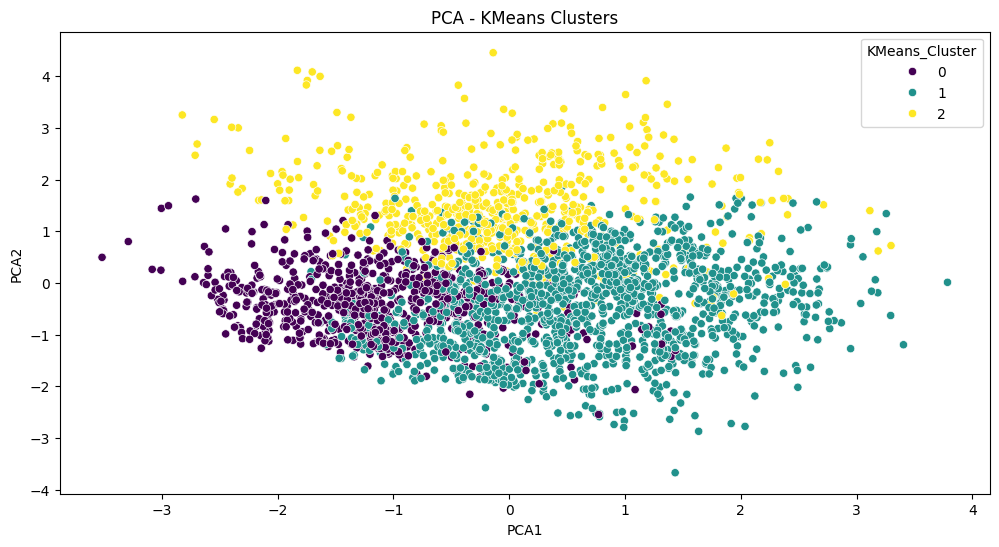

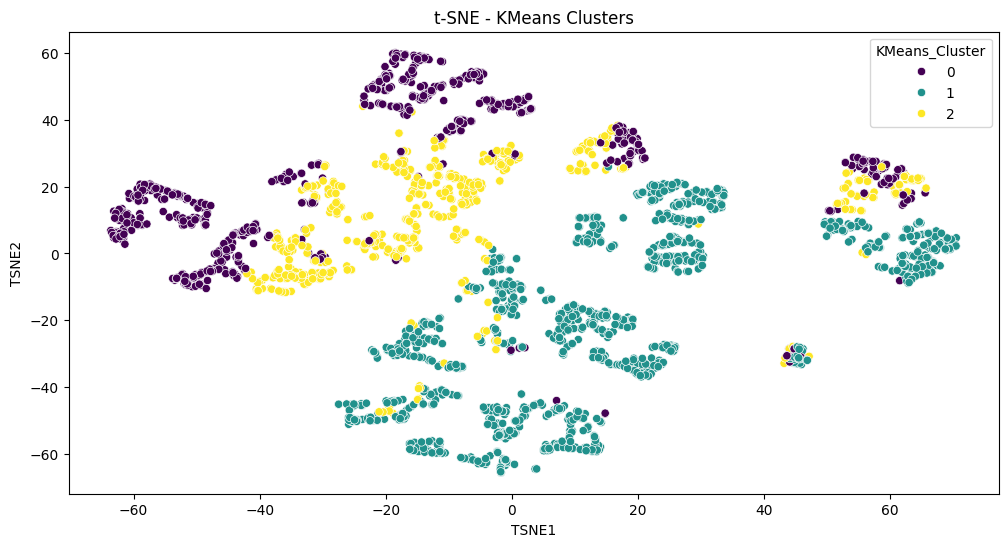

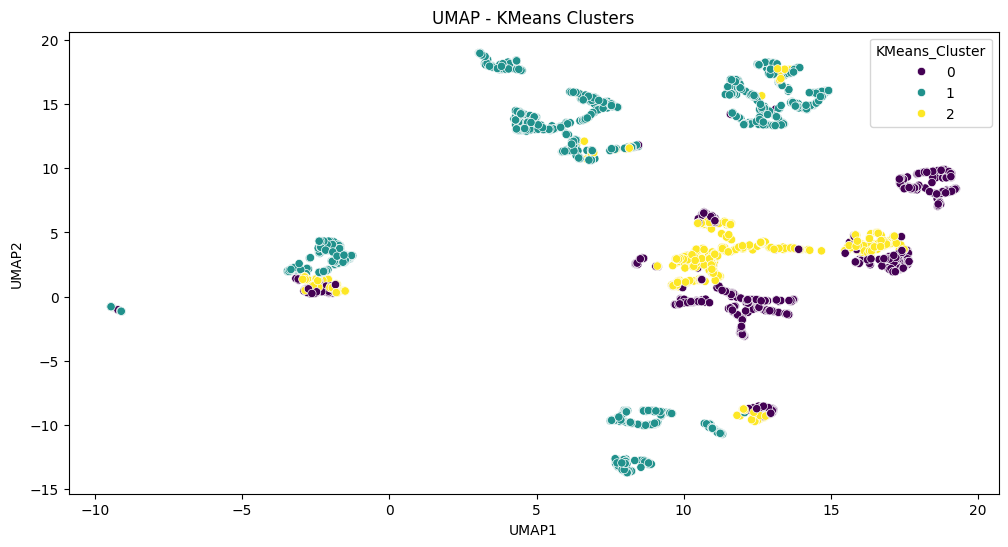

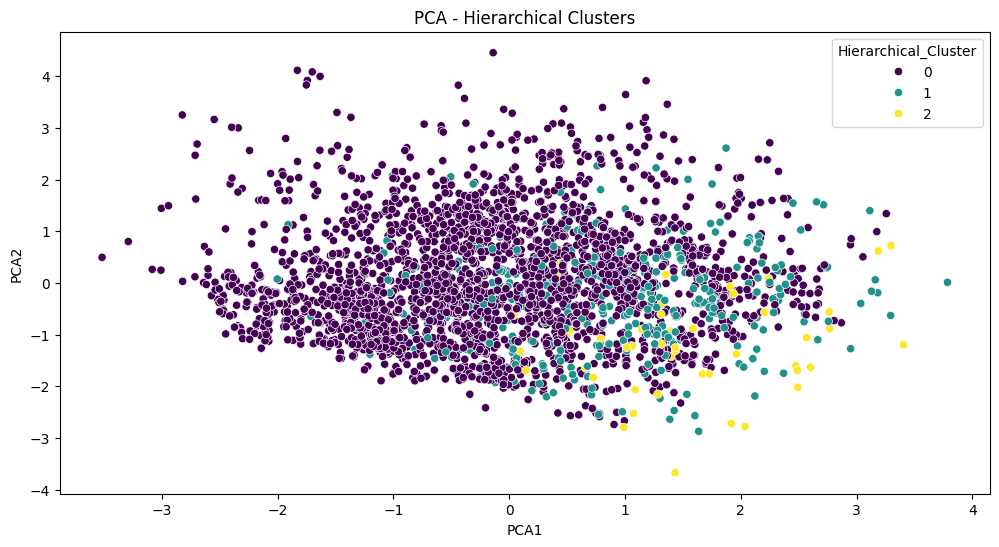

In [ ]:
# Filter the data to include only subscribers
subscribers_data = df_copy[df_copy['y'] == 1]  # Assuming 'y' is the column indicating subscription status

# Select relevant features for clustering
clustering_features = subscribers_data.drop(columns=['y', 'duration', 'campaign', 'day', 'month'], errors='ignore')

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
subscribers_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
subscribers_data['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_features)

# Visualize with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
subscribers_data['PCA1'] = pca_result[:, 0]
subscribers_data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=subscribers_data, palette='viridis')
plt.title('PCA - KMeans Clusters')
plt.show()

# Visualize with t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)
subscribers_data['TSNE1'] = tsne_result[:, 0]
subscribers_data['TSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='KMeans_Cluster', data=subscribers_data, palette='viridis')
plt.title('t-SNE - KMeans Clusters')
plt.show()

# Visualize with UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(scaled_features)
subscribers_data['UMAP1'] = umap_result[:, 0]
subscribers_data['UMAP2'] = umap_result[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='KMeans_Cluster', data=subscribers_data, palette='viridis')
plt.title('UMAP - KMeans Clusters')
plt.show()

# Visualize with Hierarchical Clustering (optional)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=subscribers_data, palette='viridis')
plt.title('PCA - Hierarchical Clusters')
plt.show()

#### To understand the clusters are clustered are properly

1) print out the features from all the clusters <br>
2) clusters 0, 1,2 If I print out the average bank-account balance for each of the clusters, I will be easy to classify the attributes of
columns, attributes.
<br>
3) For the rows, each cluster will have the cluster values
average balance for cluster 0, same for cluster1 and cluster 2 and the housing column for cluster 0, 1, 2 <br>
in what aspect they differentiate, just the table of attribute, showing the average of the values. we will be able to understand what kind of people are there in each of the clusters. <br>
For example, in cluster 0, the average age is 35, the banking accoutn would be 500Euros, housing loan would 0.5 (average). <br>
So far the visualization help us understand how the clusters are looked alike, and the last step would be figuring out the attributes of each of the cclusters for the customer segmentation. <br>
Simply, "print out average attributes values for each clusters". <br>
After calculation, create a free tableu account, "tableu public" and then start creating at dashboard that shows the insights that I would like to share with the company. <br>

Average attribute values for each KMeans Cluster:
                      age       job   marital  education   default  \
KMeans_Cluster                                                       
0               17.639201  0.968789  0.573034   0.406991  0.019975   
1               18.494700  3.245230  0.635336   1.002827  0.019081   
2               24.169118  6.907353  0.663235   1.358824  0.008824   

                    balance   housing      loan   contact        day  ...  \
KMeans_Cluster                                                        ...   
0               2261.229713  0.988764  0.111111  0.977528  14.820225  ...   
1               1754.404240  0.000707  0.153357  0.771025  12.961837  ...   
2               1975.294118  0.939706  0.108824  1.016176  14.632353  ...   

                  duration  campaign    y  Hierarchical_Cluster      PCA1  \
KMeans_Cluster                                                              
0               614.248439  1.667915  1.0              0.14

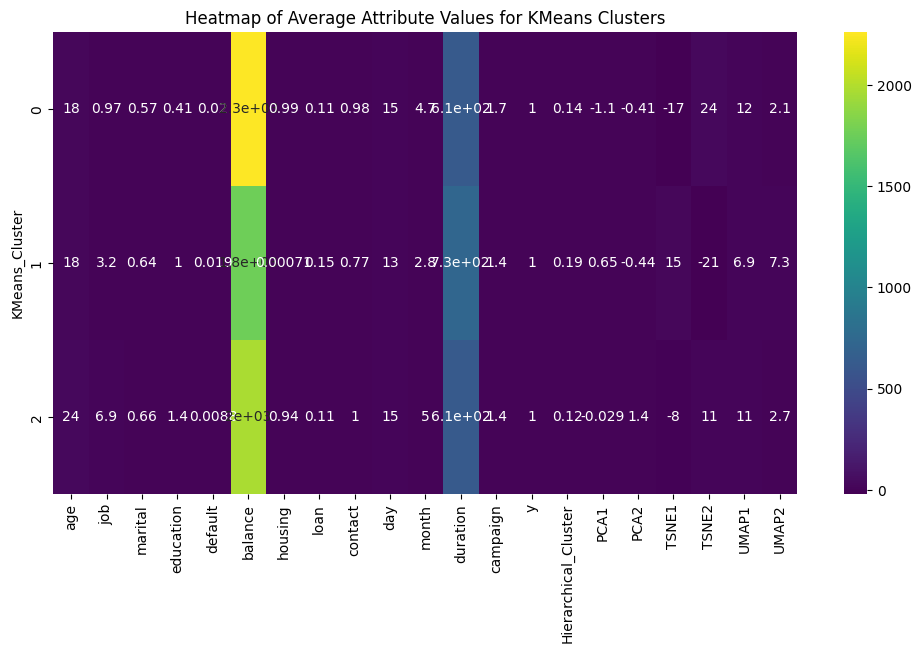

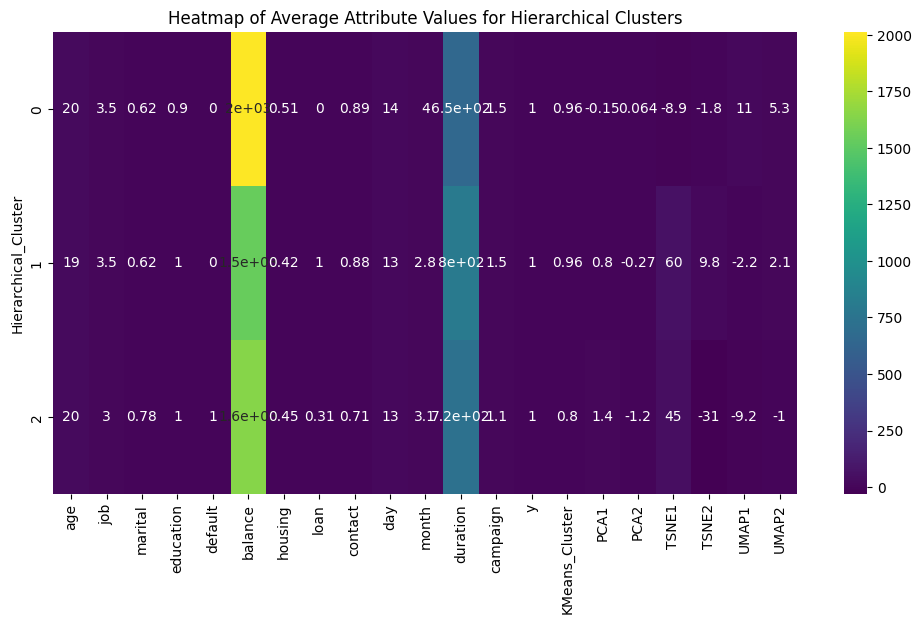

In [ ]:
# Calculate average values of all features for each KMeans Cluster
kmeans_cluster_summary = subscribers_data.groupby('KMeans_Cluster').mean()
print("Average attribute values for each KMeans Cluster:")
print(kmeans_cluster_summary)

# Calculate average values of all feautres for each Hierarchical Cluster
hierarchical_cluster_summary = subscribers_data.groupby('Hierarchical_Cluster').mean()
print("\nAverage attribute values for each Hierarchical Cluster:")
print(hierarchical_cluster_summary)

# Print specific attributes like 'balance' and 'housing'
print("\nAverage balance for each KMeans Cluster:")
print(kmeans_cluster_summary[['balance', 'housing']])

print("\nAverage bank account balance and hosing loan for each Hierachical cluster:")
print(hierarchical_cluster_summary[['balance', 'housing']])

# Visualize the average attribute values for further insights (optional)
plt.figure(figsize=(12, 6))
sns.heatmap(kmeans_cluster_summary, annot=True, cmap='viridis')
plt.title('Heatmap of Average Attribute Values for KMeans Clusters')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(hierarchical_cluster_summary, annot=True, cmap='viridis')
plt.title('Heatmap of Average Attribute Values for Hierarchical Clusters')
plt.show()

Run and get the result,
1. Write a good conclusion of the final project with a recommendations for the company.What my insights would be, how they differentiate and then create a simple dashboard on
2. Tableau (for the professional Portfolio and will help me discuss )
3. Send Semih the link for the dashboard
4. WIll finalize the project and will move to the next project!

#### Tableau에 저장하기 위해 필요한 df저장

In [ ]:
pwd

'/content'

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1. 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_copy.drop(columns=['y', 'KMeans_Cluster', 'Hierarchical_Cluster'], errors='ignore'))

# 2. PCA 적용
pca = PCA(n_components=2)  # 2차원으로 축소
pca_result = pca.fit_transform(scaled_features)
df_copy['PCA1'] = pca_result[:, 0]
df_copy['PCA2'] = pca_result[:, 1]

# 3. t-SNE 적용
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)
df_copy['TSNE1'] = tsne_result[:, 0]
df_copy['TSNE2'] = tsne_result[:, 1]

# 4. CSV로 저장
df_copy.to_csv('/content/drive/MyDrive/Apziva/TermDepositMarketing/processed_data_with_pca_tsne.csv', index=False)

print("PCA 및 t-SNE 결과가 데이터셋에 추가되었습니다.")

PCA 및 t-SNE 결과가 데이터셋에 추가되었습니다.


1. 클러스터별 평균 속성과 특성 추출

In [ ]:
# KMeans 클러스터 결과를 포함한 데이터 프레임에서 각 클러스의 평균 속성 계산
cluster_summary = subscribers_data.groupby('KMeans_Cluster').mean()

# 필요에 따라 특정 속성만 선택해서 요약
cluster_summary_selected = cluster_summary[['balance', 'age', 'housing', 'loan']]
cluster_summary_selected.reset_index(inplace=True)
print(cluster_summary_selected)

# 결과를 CSV 파일로 저장 (Tableau에서 불러오기 위해)
cluster_summary_selected.to_csv('/content/drive/MyDrive/Apziva/TermDepositMarketing/cluster_summary.csv', encoding='utf-8',index=False)

   KMeans_Cluster      balance        age   housing      loan
0               0  2261.229713  17.639201  0.988764  0.111111
1               1  1754.404240  18.494700  0.000707  0.153357
2               2  1975.294118  24.169118  0.939706  0.108824


In [ ]:
import os

save_path = '/content/drive/MyDrive/Apziva/TermDepositMarketing/'
if not os.path.exists(save_path):
    print(f"Directory does not exist: {save_path}")
else:
    print(f"Directory exists: {save_path}")

Directory exists: /content/drive/MyDrive/Apziva/TermDepositMarketing/


In [ ]:
os.makedirs(save_path, exist_ok=True)

In [ ]:
save_file_path = '/content/drive/MyDrive/Apziva/TermDepositMarketing/cluster_summary.csv'
cluster_summary_selected.to_csv(save_file_path, index=False)

print(f"File saved successfully at: {save_file_path}")

File saved successfully at: /content/drive/MyDrive/Apziva/TermDepositMarketing/cluster_summary.csv


2. 전체 데이터에서 주요 속성 추가 및 변환

In [ ]:
scaled_features

array([[-1.62323653, -1.14294501, -0.72924234, ..., -0.87697311,
        -1.20997699, -0.55177081],
       [-1.53461837, -0.81186292,  0.70493307, ..., -0.87697311,
        -1.20630932, -0.55177081],
       [-1.44600021, -0.48078084, -0.72924234, ..., -0.87697311,
        -1.20264165, -0.55177081],
       ...,
       [ 0.76945374,  0.84354748,  2.13910847, ..., -0.55104864,
        -0.09133772, -0.55177081],
       [ 1.47839901, -1.14294501, -0.72924234, ..., -0.55104864,
        -1.12562059, -0.55177081],
       [ 1.12392638, -0.81186292, -0.72924234, ..., -0.55104864,
        -0.46544004, -0.55177081]])

In [ ]:
# 구독자 데이터에서 KMeans 클러스터링 적용
subscribers_data['KMeans_Cluster'] = kmeans.predict(scaled_features)  # 클러스터 결과를 원본 데이터에 추가

# 원본 데이터와 클러스터 결과를 병합
df_copy = df_copy.merge(
    subscribers_data[["KMeans_Cluster"]], # 구독자 클러스터 결과만 추가
    how='left', # 비구독자는 NaN으로 남기기
    left_index=True,
    right_index=True
)


# NaN값을 특정 값으로 대체 (예: 비구독자는 클러스터 -1로 설정)
df_copy['KMeans_Cluster'].fillna(-1, inplace=True)

print(df_copy.head())  # 결과 확인

ValueError: X has 13 features, but KMeans is expecting 9 features as input.

3. 특정 속성의 비율 계산

In [ ]:
# 각 클러스터별 주택 대출(housing) 비율 계산
housing_ratio = subscribers_data.groupby('KMeans_Cluster')['housing'].mean()
print("Housing Loan Ratio by Cluster:")
print(housing_ratio)

# 각 클러스터별 개인 대출(loan) 비율 계산
loan_ratio = subscribers_data.groupby('KMeans_Cluster')['loan'].mean()
print("Personal Loan Ratio by Cluster:")
print(loan_ratio)


# 비율을 포함한 데이터프레임 생성
cluster_ratios = pd.DataFrame({
    'Cluster': housing_ratio.index,
    'Housing_Loan_Ratio': housing_ratio.values,
    'Personal_Loan_Ratio': loan_ratio.index,
})
cluster_ratios.to_csv("/content/drive/MyDrive/Apziva/TermDepositMarketing/cluster_ratios.csv", index=False)


Housing Loan Ratio by Cluster:
KMeans_Cluster
0    0.988764
1    0.000707
2    0.939706
Name: housing, dtype: float64
Personal Loan Ratio by Cluster:
KMeans_Cluster
0    0.111111
1    0.153357
2    0.108824
Name: loan, dtype: float64


In [ ]:
# 각 클러스터별 주택 대출(housing) 비율 계산
housing_ratio = subscribers_data.groupby('KMeans_Cluster')['housing'].mean()
print("Housing Loan Ratio by Cluster:")
print(housing_ratio)

# 각 클러스터별 개인 대출(loan) 비율 계산
loan_ratio = subscribers_data.groupby('KMeans_Cluster')['loan'].mean()
print("Personal Loan Ratio by Cluster:")
print(loan_ratio)

# 각 클러스터별 데이터 개수 계산
cluster_count = subscribers_data['KMeans_Cluster'].value_counts().sort_index()
print("Cluster Data Count:")
print(cluster_count)

# 전체 데이터 수 계산
total_count = cluster_count.sum()

# 비율 계산
percentage = (cluster_count / total_count) * 100

# 비율을 포함한 데이터프레임 생성
cluster_ratios = pd.DataFrame({
    'Cluster': cluster_count.index,            # 클러스터 ID
    'Count': cluster_count.values,            # 클러스터별 데이터 개수
    'Percentage': percentage.values,          # 클러스터별 데이터 비율
    'Housing_Loan_Ratio': housing_ratio.values, # 주택 대출 비율
    'Personal_Loan_Ratio': loan_ratio.values   # 개인 대출 비율
})

# 결과 저장
output_path = "/content/drive/MyDrive/Apziva/TermDepositMarketing/cluster_ratios_with_count_and_percentage.csv"
cluster_ratios.to_csv(output_path, index=False)

print("Cluster Ratios with Count and Percentage saved!")

Housing Loan Ratio by Cluster:
KMeans_Cluster
0    0.988764
1    0.000707
2    0.939706
Name: housing, dtype: float64
Personal Loan Ratio by Cluster:
KMeans_Cluster
0    0.111111
1    0.153357
2    0.108824
Name: loan, dtype: float64
Cluster Data Count:
KMeans_Cluster
0     801
1    1415
2     680
Name: count, dtype: int64
Cluster Ratios with Count and Percentage saved!


4.특정 속성과 클러스터 관계 데이터 준비

In [ ]:
df_copy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,PCA1,PCA2,TSNE1,TSNE2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.155678,-1.692032,-117.787254,-6.645423
1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,-2.388871,-1.214200,-60.029217,-51.153542
2,2,2,0,1,0,2,0,1,0,0,0,2,0,0,-2.439824,-0.554994,-13.984305,2.967781
3,3,3,0,2,0,3,0,0,0,0,0,3,0,0,-2.705148,0.302911,-70.129601,18.177713
4,2,4,1,2,0,4,1,0,0,0,0,4,0,0,-2.049768,0.338460,0.492177,96.488449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,10,1,0,0,0,412,1,0,1,20,1,100,0,0,0.641039,-0.837199,77.536201,64.757408
39996,33,0,1,0,0,5639,1,0,1,20,1,132,2,1,1.698346,-1.541758,99.299591,9.741034
39997,27,6,2,1,0,455,1,0,1,20,1,305,0,1,0.455147,0.042685,61.880074,-12.265760
39998,35,0,0,0,0,1073,1,0,1,20,1,23,0,0,0.894500,-1.104968,85.757385,69.698097


In [ ]:
# 클러스터, 잔고(balance), 나이(age), 구독 여부(y)를 포함한 데이터 준비
selected_columns = df_copy[['KMeans_Cluster', 'balance', 'age', 'housing', 'loan', 'y']]
selected_columns.to_csv("/content/drive/MyDrive/Apziva/TermDepositMarketing/selected_columns_for_tableau.csv", index=False)

KeyError: "['KMeans_Cluster'] not in index"

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1. 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_copy.drop(columns=['y', 'KMeans_Cluster', 'Hierarchical_Cluster'], errors='ignore'))

# 2. PCA 적용
pca = PCA(n_components=2)  # 2차원으로 축소
pca_result = pca.fit_transform(scaled_features)
df_copy['PCA1'] = pca_result[:, 0]
df_copy['PCA2'] = pca_result[:, 1]

# 3. t-SNE 적용
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)
df_copy['TSNE1'] = tsne_result[:, 0]
df_copy['TSNE2'] = tsne_result[:, 1]

# 4. CSV로 저장
df_copy.to_csv('/content/drive/MyDrive/Apziva/TermDepositMarketing/processed_data_with_pca_tsne.csv', index=False)

print("PCA 및 t-SNE 결과가 데이터셋에 추가되었습니다.")

In [ ]:
# cluster_ratios_with_count_and_percentage.csv 불러오기
file_path = "/content/drive/MyDrive/Apziva/TermDepositMarketing/cluster_ratios_with_count_and_percentage.csv"
df = pd.read_csv(file_path)

# 필요한 열만 선택
pie_chart_data = df[['Cluster', 'Percentage']]

# CSV 저장 (Tableau에서 사용)
output_path = "/content/drive/MyDrive/Apziva/TermDepositMarketing/pie_chart_data.csv"
pie_chart_data.to_csv(output_path, index=False)

print("Pie chart data saved successfully!")

Pie chart data saved successfully!
